In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import os

In [3]:
import os 

In [4]:
os.listdir('ssd_mobilenet_v1_coco_2017_11_17')

['frozen_inference_graph.pb']

['frozen_inference_graph.pb']

In [5]:
labels = [0,1,2,3,4,5,6,7,8,9]
to_categorical(labels)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [6]:
import tensorflow.keras as keras

In [7]:
keras.initializers.truncated_normal()

In [8]:
# learning rate , no of epochs and batch size

init_lr = 1e-4
epochs = 2
bs = 16

In [9]:
directory = r'archive\data'

In [10]:
os.listdir(directory)

['without_mask', 'with_mask']

['without_mask', 'with_mask']

In [11]:
data = []
labels = []

for category in os.listdir(directory):
    path = os.path.join(directory , category)
    for img in os.listdir(path):
        img_path = os.path.join(path , img)
        image = load_img(img_path , target_size = (224,224))
        image = img_to_array(image)
        image = preprocess_input(image)
        
        data.append(image)
        labels.append(category)
        
print(labels[:10])

D:\Anaconda\envs\myenv\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
D:\Anaconda\envs\myenv\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


['without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask']
['without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask']


In [12]:
np.array(data).shape

(7553, 224, 224, 3)

(7553, 224, 224, 3)

In [13]:
data[0].shape

(224, 224, 3)

(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


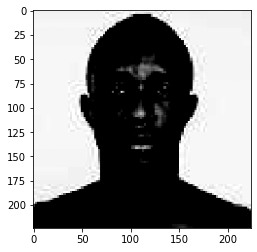

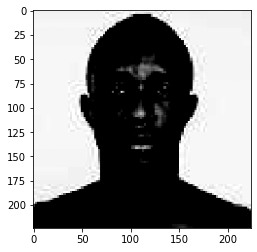

In [14]:
plt.imshow(data[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


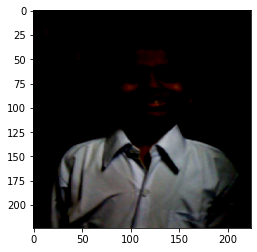

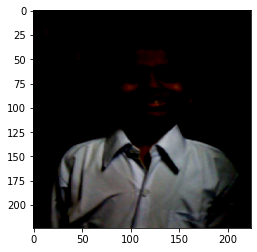

In [15]:
plt.imshow(data[200])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


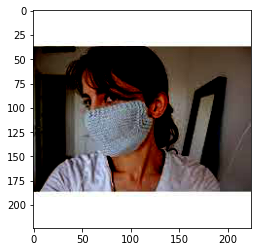

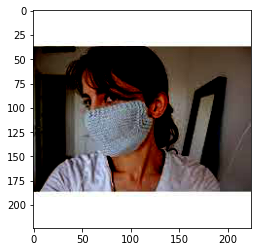

In [16]:
plt.imshow(data[5110])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


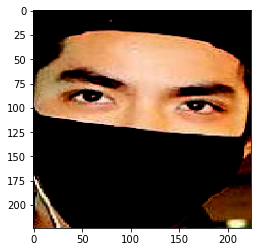

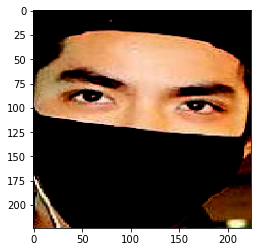

In [17]:
plt.imshow(data[7552])

In [18]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [19]:
labels = to_categorical(labels)
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [20]:
data = np.array(data , dtype = 'float32')
labels = np.array(labels)

In [21]:
(X_Train , X_Test , Y_Train , Y_Test) = train_test_split(data , labels , test_size = 0.2 , stratify = labels , random_state = 42)

In [22]:
# DATA AUGMENTATION

aug = ImageDataGenerator(
    rotation_range = 20,
    zoom_range = 0.15,
    width_shift_range = 0.2 ,
    height_shift_range = 0.2,
    shear_range = 0.15,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

## MODEL

In [23]:
basemodel = MobileNetV2(weights = 'imagenet' , include_top = False , input_tensor = Input(shape = (224,224,3)))

In [24]:
## CONSTRUCT THE HEAD OF THE MODEL THAT WILL BE PLACED ON TOP THE BASE MODEL

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (7,7))(headmodel)
headmodel = Flatten(name = 'flatten')(headmodel)
headmodel = Dense(128 , activation = 'relu')(headmodel)
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(2 , activation = 'softmax')(headmodel)

In [25]:
model = Model(inputs = basemodel.input , outputs = headmodel)

In [26]:
# loop over all the layers in the base model and freeze them so they will not be updated during training process

for layer in basemodel.layers:
    layer.trainable = False

In [27]:
opt = Adam(learning_rate = init_lr , decay = init_lr/epochs)
model.compile(loss= 'binary_crossentropy' , optimizer = opt , metrics = ['accuracy'])

In [28]:
H = model.fit(
    aug.flow(X_Train , Y_Train  , batch_size = bs),
#     steps_per_epoch = len(X_Train)//bs,
#     validation_data = (X_Test , Y_Test),
#     validation_steps = len(X_Test)//bs,
    epochs = epochs
)

Epoch 1/2
Epoch 1/2
378/378 [==============================] - 245s 535ms/step - loss: 0.2303 - accuracy: 0.9207
Epoch 2/2
Epoch 2/2
378/378 [==============================] - 161s 425ms/step - loss: 0.0747 - accuracy: 0.9778


In [29]:
tf.keras.backend.clear_session()

In [30]:
preds = model.predict(X_Test , bs)

In [31]:
preds[:10]

array([[2.7621841e-06, 9.9999726e-01],
       [3.8879283e-05, 9.9996114e-01],
       [2.7892631e-03, 9.9721080e-01],
       [2.0152077e-01, 7.9847926e-01],
       [9.9999106e-01, 8.9804735e-06],
       [3.2471948e-07, 9.9999964e-01],
       [9.9999785e-01, 2.1973624e-06],
       [7.3743183e-07, 9.9999928e-01],
       [6.8125182e-08, 9.9999988e-01],
       [2.0264899e-06, 9.9999797e-01]], dtype=float32)

array([[2.7621841e-06, 9.9999726e-01],
       [3.8879283e-05, 9.9996114e-01],
       [2.7892631e-03, 9.9721080e-01],
       [2.0152077e-01, 7.9847926e-01],
       [9.9999106e-01, 8.9804735e-06],
       [3.2471948e-07, 9.9999964e-01],
       [9.9999785e-01, 2.1973624e-06],
       [7.3743183e-07, 9.9999928e-01],
       [6.8125182e-08, 9.9999988e-01],
       [2.0264899e-06, 9.9999797e-01]], dtype=float32)

In [32]:
prediction = np.argmax(preds , axis = 1)

In [34]:
Y_Test = Y_Test.argmax(1)

In [35]:
print(classification_report(Y_Test , prediction , target_names = lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.97      0.99      0.98       745
without_mask       0.99      0.97      0.98       766

    accuracy                           0.98      1511
   macro avg       0.98      0.98      0.98      1511
weighted avg       0.98      0.98      0.98      1511

              precision    recall  f1-score   support

   with_mask       0.97      0.99      0.98       745
without_mask       0.99      0.97      0.98       766

    accuracy                           0.98      1511
   macro avg       0.98      0.98      0.98      1511
weighted avg       0.98      0.98      0.98      1511



In [36]:
print('Saving mask detection model')
model.save('mask_detector.model' , save_format = 'h5')

Saving mask detection model
Saving mask detection model


D:\Anaconda\envs\myenv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
D:\Anaconda\envs\myenv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


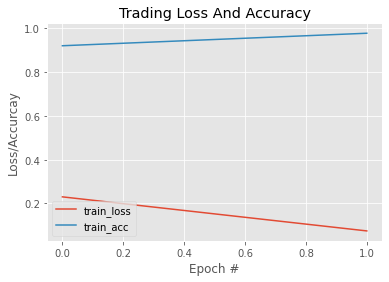

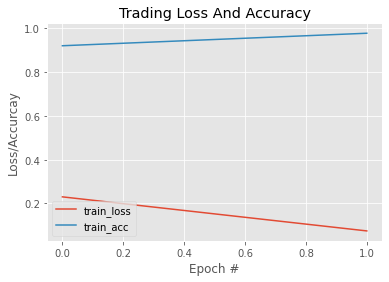

In [109]:
N = epochs
plt.style.use('ggplot')
plt.figure()
plt.plot([0,1] , np.array([H.history['loss']]).reshape(2,-1) , label = 'train_loss')
plt.plot([0,1] , np.array([H.history['accuracy']]).reshape(2,-1) , label = 'train_acc')
# plt.plot(np.array(np.arange(0,2)).reshape(1,-1) , np.array([H.history['loss'][1]]), label = 'val_loss')
# plt.plot(np.array(np.arange(0,2)).reshape(1,-1) , np.array([H.history['accuracy'][1]]) , label = 'val_acc')
plt.title('Traning Loss And Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accurcay')
plt.legend(loc = 'lower left')
plt.savefig('plot.png')

In [42]:
dict(H.history)

{'loss': [0.23030726611614227, 0.07470329850912094],
 'accuracy': [0.9207215905189514, 0.9778218865394592]}

{'loss': [0.23030726611614227, 0.07470329850912094],
 'accuracy': [0.9207215905189514, 0.9778218865394592]}